# Day 4

KNN Algorithm

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# STEP 1: Split the dataset (ALWAYS do this BEFORE scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 2: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# STEP 3: Initialize and train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# STEP 4: Make predictions
y_pred = knn.predict(X_test)

# STEP 5: Evaluate the model
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


Accuracy: 0.95
Confusion Matrix:
 [[40  3]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Prediction (0=Class A, 1=Class B): [0]


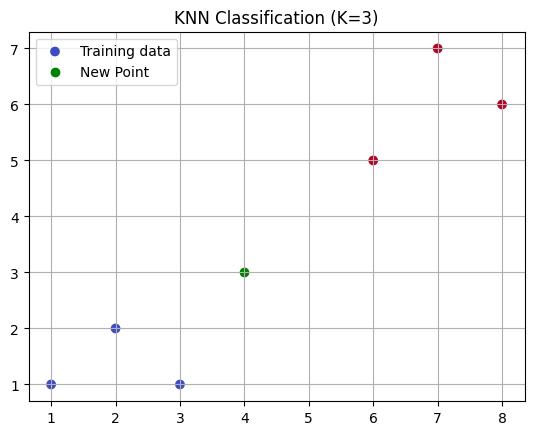

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

X = np.array([[1, 1], [2, 2], [3, 1], [6, 5], [7, 7], [8, 6]])  # Features
y = np.array([0, 0, 0, 1, 1, 1])  # Labels (0 or 1)

model = KNeighborsClassifier(n_neighbors=3)  # Try K = 3
model.fit(X, y)

new_point = np.array([[4, 3]])
prediction = model.predict(new_point)
print("Prediction (0=Class A, 1=Class B):", prediction)

plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', label='Training data')
plt.scatter(new_point[0][0], new_point[0][1], color='green', label='New Point')
plt.legend()
plt.grid(True)
plt.title('KNN Classification (K=3)')
plt.show()


SVM (Support vector Machine)

In [4]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import joblib
from sklearn.model_selection import train_test_split

X = np.array([
    [1, 0, 1, 1, 1],  # approved
    [0, 1, 0, 0, 0],  # denied
    [1, 1, 1, 1, 1],  # approved
    [0, 0, 0, 0, 1],  # denied
    [1, 0, 1, 1, 0],  # approved
    [0, 1, 0, 0, 1],  # denied
    [1, 0, 0, 1, 1],  # approved
    [1, 1, 1, 0, 1],  # approved
    [0, 1, 1, 0, 0],  # denied
    [1, 0, 1, 0, 1],  # approved
])

y = np.array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1])  # 1 = approved, 0 = denied

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel="linear")
model.fit(X_train, y_train)


joblib.dump(model,"Bank_approve.plk")

model =joblib.load("Bank_approve.plk")

test_preds = model.predict(X_test)

print("Accuracy on Test Data:", accuracy_score(y_test, test_preds))
print("\nClassification Report on Test Data:\n", classification_report(y_test, test_preds))

new_customers = np.array([
    [1, 0, 1, 1, 1],  # expected approved
    [0, 1, 0, 0, 0],  # expected denied
])

new_preds=model.predict(new_customers)
for i,  preds in  enumerate(new_preds):
    label= ["Denied","Approved"][preds]
    print(f"Loans for {i+1} is {label}")

Accuracy on Test Data: 1.0

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Loans for 1 is Approved
Loans for 2 is Denied


In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X = data.data
y = data.target

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

print(f"Accuracy Score:{acc :.2f}")
print("Confusion Matrix :\n",cm)
print("Classification Report: \n",report)

Accuracy Score:0.96
Confusion Matrix :
 [[41  2]
 [ 3 68]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Decision Tree

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X = data.data
y = data.target

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # FIXED: Pass X_train here
X_test = scaler.transform(X_test)     

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy score: {acc:.2f}")
print("Confusion Matrix : \n",cm)
print("Classification Matrix : \n",report)

Accuracy score: 0.95
Confusion Matrix : 
 [[40  3]
 [ 3 68]]
Classification Matrix : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [3]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

X = np.array([[1,1,1], [1,0,1], [0,0,0], [0,1,0]])
Y = np.array([1,1,0,0])

model = DecisionTreeClassifier()
model.fit(X,Y)

New_Fruit=np.array([[1,1,0]])
predict=model.predict(New_Fruit)
print("New Fruit 1 = Banana / 0 = Not Banana):",predict)

New Fruit 1 = Banana / 0 = Not Banana): [0]
